http://ilanaseidl.github.io

# Final Tutorial: Newsletter Data

This project will analyze data from The Root, a financial literacy newsletter I send out every week. I will be analyzing both subscriber and campaign data. The data is collected through Mailchimp, the ESP I use to send out The Root.

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns


#widening notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
pd.options.display.width = 1000

## Loading in Campaign Data 

I am using datasets that are easily downloadable with a Mailchimp account. The data sets are also neatly organized into CSV files which are easy to load into pandas. I am doing this below.

In [2]:
df1 = pd.read_csv("./campaigns.csv")
df1

,Title,Subject,List,Send Date,Send Weekday,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Total Bounces,Times Forwarded,Forwarded Opens,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,Abuse Complaints,Times Liked on Facebook,Folder Id,Unique Id,Total Orders,Total Gross Sales,Total Revenue
0,newsletter no.1,newsletter no.1,the root,"Aug 12, 2019 06:58 am",Monday,212,210,1,1,2,0,0,113,53.81%,280,9,4.29%,17,3,0,0,0,52dc3b9652,0,0,0
1,(copy 01),newsletter no.1,the root,"Aug 12, 2019 09:46 am",Monday,1,1,0,0,0,0,0,1,100.00%,2,0,0.00%,0,0,0,0,0,cd248d0904,0,0,0
2,newsletter 2,get. that. money. (newsletter no. 2),the root,"Aug 19, 2019 07:02 am",Monday,233,232,1,0,1,0,0,129,55.60%,235,0,0.00%,0,0,0,0,0,9678b64e0a,0,0,0
3,newsletter 2 (copy 01),get. that. money. (newsletter no. 2),the root,"Aug 19, 2019 04:50 pm",Monday,4,4,0,0,0,0,0,3,75.00%,7,0,0.00%,0,0,0,0,0,947745607a,0,0,0
4,newsletter 3,all. i. see. is. $$$$ (newsletter no. 3),the root,"Aug 26, 2019 07:00 am",Monday,254,253,1,0,1,0,0,140,55.34%,251,0,0.00%,0,3,0,0,0,2ce6a43658,0,0,0
5,[Re-sent] newsletter 3,all. i. see. is. $$$$ (newsletter no. 3),the root,"Aug 27, 2019 02:43 pm",Tuesday,125,124,1,0,1,0,0,35,28.23%,53,0,0.00%,0,0,0,0,0,f4590c31ee,0,0,0
6,newsletter 4,turns out i'm 100% that rich.,the root,"Sep 02, 2019 09:37 am",Monday,268,266,2,0,2,0,0,120,45.11%,227,5,1.88%,8,2,0,0,0,8948eb5765,0,0,0
7,[Re-sent] newsletter 4,turns out i'm 100% that rich.,the root,"Sep 04, 2019 10:57 am",Wednesday,159,158,0,1,1,0,0,24,15.19%,35,0,0.00%,0,0,0,0,0,9ef2489177,0,0,0
8,newsletter 5,if you're reading this...,the root,"Sep 09, 2019 03:05 am",Monday,278,278,0,0,0,0,0,121,43.53%,214,2,0.72%,3,1,0,0,0,eaf380c10e,0,0,0
9,Newsletter 6,hey... we need to talk,the root,"Sep 16, 2019 07:49 am",Monday,283,282,1,0,1,0,0,106,37.59%,240,3,1.06%,6,1,0,0,0,15129cdaa5,0,0,0


In [3]:
df1.shape

(27, 26)

In [4]:
df1.dtypes

Title                      object
Subject                    object
List                       object
Send Date                  object
Send Weekday               object
Total Recipients            int64
Successful Deliveries       int64
Soft Bounces                int64
Hard Bounces                int64
Total Bounces               int64
Times Forwarded             int64
Forwarded Opens             int64
Unique Opens                int64
Open Rate                  object
Total Opens                 int64
Unique Clicks               int64
Click Rate                 object
Total Clicks                int64
Unsubscribes                int64
Abuse Complaints            int64
Times Liked on Facebook     int64
Folder Id                   int64
Unique Id                  object
Total Orders                int64
Total Gross Sales           int64
Total Revenue               int64
dtype: object

## Loading in Subscriber data

In [5]:
sub_df = pd.read_csv("./newsletteraudience/subscribed.csv")
unsub_df = pd.read_csv("./newsletteraudience/unsubscribed.csv")

As we can see, the data is mainly int64s which will be helpful for coming to some conclusions about our data but we will still need to make some changes.

In [6]:
print(sub_df.shape)
print(unsub_df.shape)

(678, 22)
(17, 26)


Now that our lists are merged, let's get a better view of what we are working with.

In [7]:
contacts = pd.concat([sub_df, unsub_df], sort = False, ignore_index = True) 
contacts.shape

(695, 27)

In [8]:
contacts.dtypes

What's your first name?                                object
Last name?                                             object
Email?                                                 object
How did you find us?                                   object
From 1-10, how comfortable do you feel with money?     object
MEMBER_RATING                                           int64
OPTIN_TIME                                             object
OPTIN_IP                                               object
CONFIRM_TIME                                           object
CONFIRM_IP                                             object
LATITUDE                                               object
LONGITUDE                                              object
GMTOFF                                                 object
DSTOFF                                                 object
TIMEZONE                                               object
CC                                                     object
REGION  

In [9]:
contacts.isnull().sum()

What's your first name?                               219
Last name?                                            228
Email?                                                  0
How did you find us?                                  316
From 1-10, how comfortable do you feel with money?    356
MEMBER_RATING                                           0
OPTIN_TIME                                              0
OPTIN_IP                                              694
CONFIRM_TIME                                            0
CONFIRM_IP                                            206
LATITUDE                                              194
LONGITUDE                                             194
GMTOFF                                                387
DSTOFF                                                387
TIMEZONE                                              253
CC                                                    194
REGION                                                194
LAST_CHANGED  

As you can see, there are a lot of missing records. We are only going to keep columns that will aid us in understanding our data better.

# Subscriber data: anonymizing, sorting, and visualizing

We are going to work with two different kinds of data. The first includes looking into our subscriber list. In order to protect people's data-- we are going to shuffle and clean the data to keep it anonymous.

In [10]:
contacts = contacts[["Email?","MEMBER_RATING", "REGION", "TIMEZONE"]]
shuffled = contacts.reindex(np.random.permutation(contacts.index))

In [11]:
shuffled.reset_index(inplace = True)

In [12]:
shuffled['email_id'] = shuffled.index
shuffled.drop(columns = ['Email?', 'index'], inplace = True)

In [13]:
shuffled.set_index("email_id")

,MEMBER_RATING,REGION,TIMEZONE
email_id,,,
0,3,ta,NaN
1,3,NaN,NaN
2,2,FL,America/Kentucky/Monticello
3,4,la,504
4,2,TX,America/Chicago
...,...,...,...
690,3,NaN,NaN
691,3,NaN,NaN
692,3,tx,214/469/972


Out of curiosity, lets see how many records have a NaN value.

In [14]:
shuffled.isnull().sum()

MEMBER_RATING      0
REGION           194
TIMEZONE         253
email_id           0
dtype: int64

This number of NaNs will be something to look into for future data collection. This is data gathered by Mailchimp-- I wonder how they determine the information.

Timezone is a helpful one to know -- we can optimize send times based on location. This is hard when we don't know what timezone the subscriber is in!

In [15]:
shuffled.to_csv("cleaned.csv")

Now just saving cleaned data into csv for future use and exploration.

# Subscriber Analysis

In [16]:
clean_sorted = shuffled.sort_values(['MEMBER_RATING'], ascending=False)
clean_sorted.set_index("email_id", inplace = True)
clean_sorted.dropna(inplace = True)
rating_df = clean_sorted.copy()
clean_sorted.head()

,MEMBER_RATING,REGION,TIMEZONE
email_id,,,
328,5,pa,610/484
205,5,dc,202
217,5,la,504
165,5,fl,305/786
159,5,la,504


## Regional Data and Visualization

According to Mailchimp, regions are an estimate based on IP address data. The contact's IP address is first collected when they sign up and is updated as they engage with the email campaigns.

In [17]:
clean_sorted["REGION"].value_counts().head(10)

la    95
ny    75
LA    36
fl    35
tx    31
FL    15
ca    13
mi    12
ga    12
nj    11
Name: REGION, dtype: int64

In [18]:
clean_sorted['region'] = clean_sorted['REGION'].str.upper()
clean_sorted.drop(columns = ['REGION'], inplace = True)

Now that the data has been tidied a bit further, I am getting the counts for each region to get a better overview of my subscriber list.

In [19]:
region_counts = clean_sorted["region"].value_counts(ascending = False)
region_counts_df = pd.DataFrame(region_counts)
region_counts_df.reset_index()
region_counts_df.head()

,region
LA,131
NY,80
FL,50
TX,36
CA,17


Text(0.5, 1.0, 'Top 5 Regions')

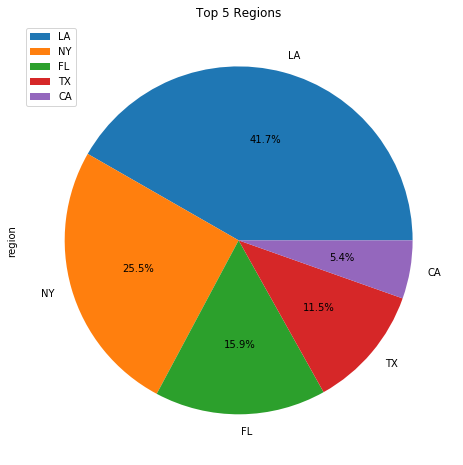

In [20]:
region_counts_df.iloc[:5].plot.pie(y = 'region', figsize = (8,8), autopct = '%1.1f%%')
plt.title('Top 5 Regions', color='black')

# Subscriber Rating Analysis

This dataframe is not as helpful as it could be-- going to set up a pivot table.

In [21]:
rating_df.reset_index(inplace = True)

In [22]:
region_counts = clean_sorted["region"].value_counts(ascending = False)
region_counts_df = pd.DataFrame(region_counts)
region_counts_df.reset_index()
region_counts_df.head()



,region
LA,131
NY,80
FL,50
TX,36
CA,17


The pivot table helps but... let's visualize it!

In [23]:
rating_df

,email_id,MEMBER_RATING,REGION,TIMEZONE
0,328,5,pa,610/484
1,205,5,dc,202
2,217,5,la,504
3,165,5,fl,305/786
4,159,5,la,504
5,477,5,ny,718/347
6,478,5,tx,817/682
7,265,5,la,504
8,527,5,la,504
9,611,5,wy,307


This graph gives me a good idea of how engaged my subscribers are. Most are at a 2 which is interesting. Mailchimp has its own metrics for rating subscribers-- now I know what to look into more!

# Campaign data: aggregating, sorting, and tidying

Now, I am tidying up the data so we have the information we need.

In [24]:
df_interest = df1.iloc[:, 0:21]
metrics1 = df_interest.iloc[:, 1:3]
metrics2 = df_interest.iloc[:, 3:9]
metrics3 = df_interest.iloc[:, 12:18]
metrics = pd.concat([metrics1, metrics2, metrics3], axis = 1)
metrics.drop(['Subject','List', 'Send Weekday'], axis = 1, inplace = True)

metrics['campaign_id'] = metrics.index
#metrics.drop(columns = 'index', inplace = True)

metrics["Send Date"] = pd.to_datetime(metrics["Send Date"])
metrics.set_index("Send Date", inplace = True)

metrics['time'] = metrics.index.time

metrics.head()

,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks,campaign_id,time
Send Date,,,,,,,,,,,,
2019-08-12 06:58:00,212,210,1,1,113,53.81%,280,9,4.29%,17,0,06:58:00
2019-08-12 09:46:00,1,1,0,0,1,100.00%,2,0,0.00%,0,1,09:46:00
2019-08-19 07:02:00,233,232,1,0,129,55.60%,235,0,0.00%,0,2,07:02:00
2019-08-19 16:50:00,4,4,0,0,3,75.00%,7,0,0.00%,0,3,16:50:00
2019-08-26 07:00:00,254,253,1,0,140,55.34%,251,0,0.00%,0,4,07:00:00


## Officially Tidy-ed Data

In [25]:
metrics.head()

,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks,campaign_id,time
Send Date,,,,,,,,,,,,
2019-08-12 06:58:00,212,210,1,1,113,53.81%,280,9,4.29%,17,0,06:58:00
2019-08-12 09:46:00,1,1,0,0,1,100.00%,2,0,0.00%,0,1,09:46:00
2019-08-19 07:02:00,233,232,1,0,129,55.60%,235,0,0.00%,0,2,07:02:00
2019-08-19 16:50:00,4,4,0,0,3,75.00%,7,0,0.00%,0,3,16:50:00
2019-08-26 07:00:00,254,253,1,0,140,55.34%,251,0,0.00%,0,4,07:00:00


In [26]:
metrics.dtypes

Total Recipients          int64
Successful Deliveries     int64
Soft Bounces              int64
Hard Bounces              int64
Unique Opens              int64
Open Rate                object
Total Opens               int64
Unique Clicks             int64
Click Rate               object
Total Clicks              int64
campaign_id               int64
time                     object
dtype: object

In [27]:
metrics.shape

(27, 12)

# Visualizing Campaign Data

## Total Opens by Campaign Group

I am splitting the campaigns into groups using the Pandas cut function. Then, I am going to create a pivot table to see total opens as campaigns have gone on.

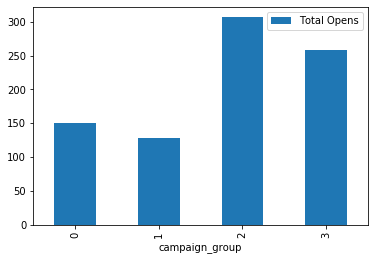

In [28]:
metrics['campaign_group'] = pd.cut(metrics['campaign_id'], bins = 4, labels = False)
time_table = pd.pivot_table(metrics, values = ["Total Opens"], index = "campaign_group", aggfunc = np.mean)
time_table.plot(kind = 'bar')


This visualization tells me that the last few campaigns have not had as many opens as ones before. It will be interesting to note why/what can be done with this data to improve.

## Successful Deliveries Correlation

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text yticklabel objects>)

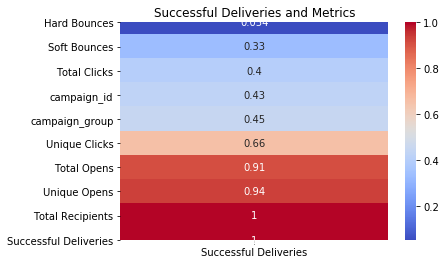

In [29]:
ax = sns.heatmap(metrics.corr()[['Successful Deliveries']].sort_values('Successful Deliveries'),cmap = 'coolwarm',annot = True,
           xticklabels = True).set_title("Successful Deliveries and Metrics")
plt.yticks(rotation=0)



This graph shows the relationship between successful newsletter deliveries and the other metrics we are observing. As expected, hard bounces and successful deliveries have a very low correlation. 

## Time and Metrics

In [30]:
metrics.head()

,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks,campaign_id,time,campaign_group
Send Date,,,,,,,,,,,,,
2019-08-12 06:58:00,212,210,1,1,113,53.81%,280,9,4.29%,17,0,06:58:00,0
2019-08-12 09:46:00,1,1,0,0,1,100.00%,2,0,0.00%,0,1,09:46:00,0
2019-08-19 07:02:00,233,232,1,0,129,55.60%,235,0,0.00%,0,2,07:02:00,0
2019-08-19 16:50:00,4,4,0,0,3,75.00%,7,0,0.00%,0,3,16:50:00,0
2019-08-26 07:00:00,254,253,1,0,140,55.34%,251,0,0.00%,0,4,07:00:00,0


## Total Clicks vs Unique Clicks

<Figure size 1800x1800 with 0 Axes>

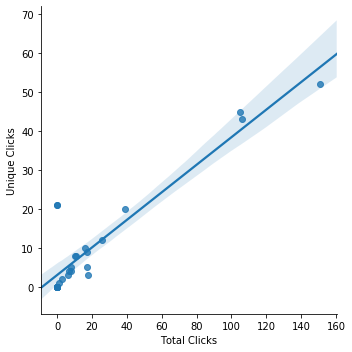

In [31]:
plt.figure(figsize = (25,25))
sns.lmplot(x="Total Clicks", y = "Unique Clicks", data = metrics)

## Unique Opens vs Total Recipients

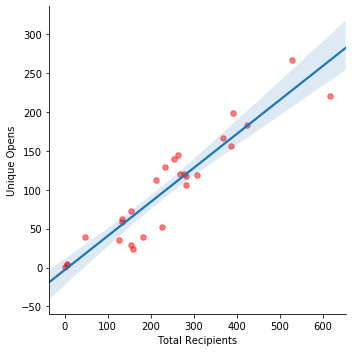

In [32]:
sns.lmplot(x='Total Recipients',y='Unique Opens',fit_reg=True,scatter_kws={"color":"red","alpha":0.5
                                                                     ,"s":30},data=metrics)

This graph shows the positive correlation between Total Recipients and unique opens. This is interesting to see because as the list has grown, people have continued opening emails. This is opposed to a "dead list"-- where the number of subscribers is high but the actual engagement is close to nothing. 

## Metrics by Hour

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

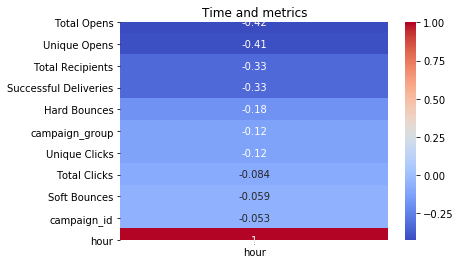

In [34]:
metrics['hour'] = metrics.index.hour

ax = sns.heatmap(metrics.corr()[['hour']].sort_values('hour'),cmap = 'coolwarm',annot = True,
           xticklabels = True).set_title("Time and metrics")
plt.yticks(rotation=0)

In [35]:

def by_hour(measures):
    fig, ax = subplots(figsize=(20,10))
    for x in measures:
        metrics.groupby('hour').mean().plot(kind = 'line', ax = ax, grid = True)
    plt.suptitle('Metrics by Hour', x=0.5, y=0.95, ha='center', fontsize='xx-large')
    
    fig.text(0.5, 0.04, 'Hour', ha='center')
    fig.text(0.09, 0.5, 'Average', va='center', rotation='vertical')
    ax.legend(measures)
    return ax

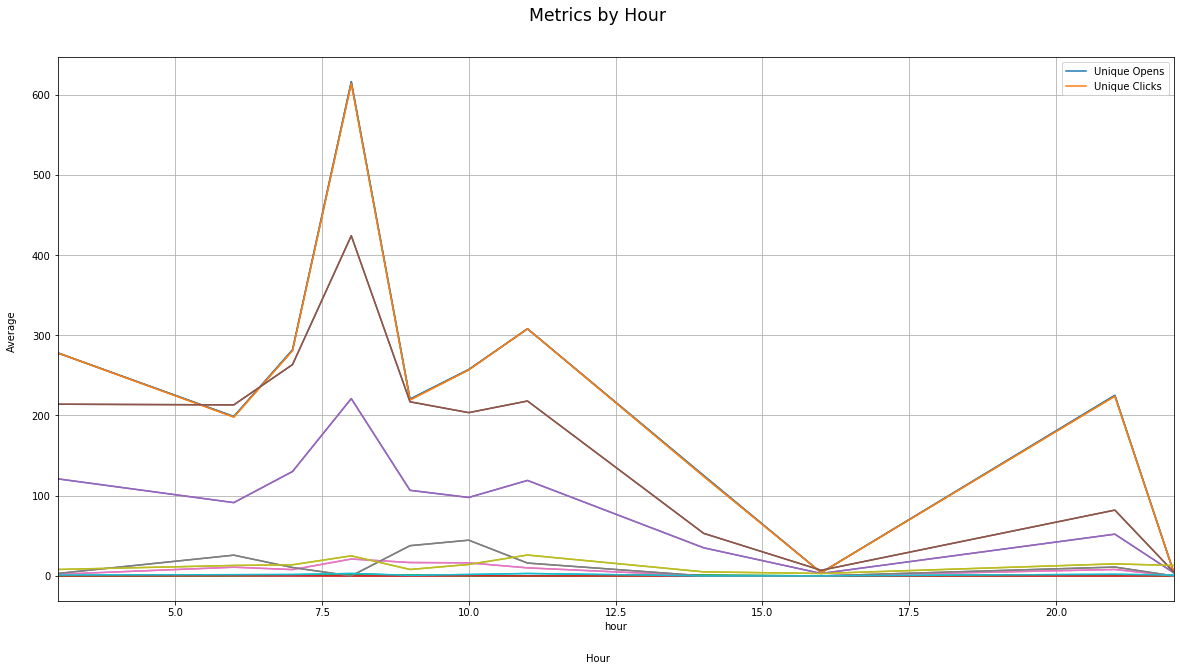

In [36]:
ax = by_hour(['Unique Opens', 'Unique Clicks'])

This graph aims to show what times work best for sending out newsletters. As we can see, mornings closer to 7:30 AM work best. This graph is difficult to use fully, though, because my subscribers are from a few different time zones.

## Metrics by Month

In [37]:
metrics['month'] = metrics.index.month

def by_month(measures):
    fig, ax = subplots(figsize=(20,10))
    for x in measures:
        month_table.groupby('month').mean().plot(kind = 'line', ax = ax, grid = True)
    plt.suptitle('Metrics by Month', x=0.5, y=0.95, ha='center', fontsize='xx-large')
    
    fig.text(0.5, 0.04, 'Month', ha='center')
    fig.text(0.09, 0.5, '# of Subscribers', va='center', rotation='vertical')
    ax.legend(measures)
    return ax

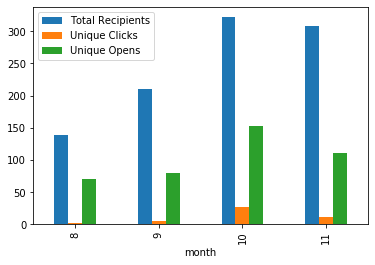

In [40]:
month_table.plot(kind = 'bar')